In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

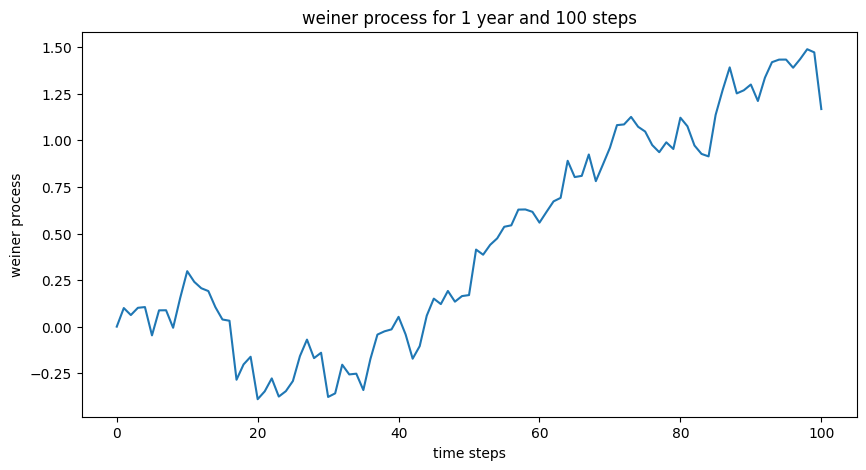

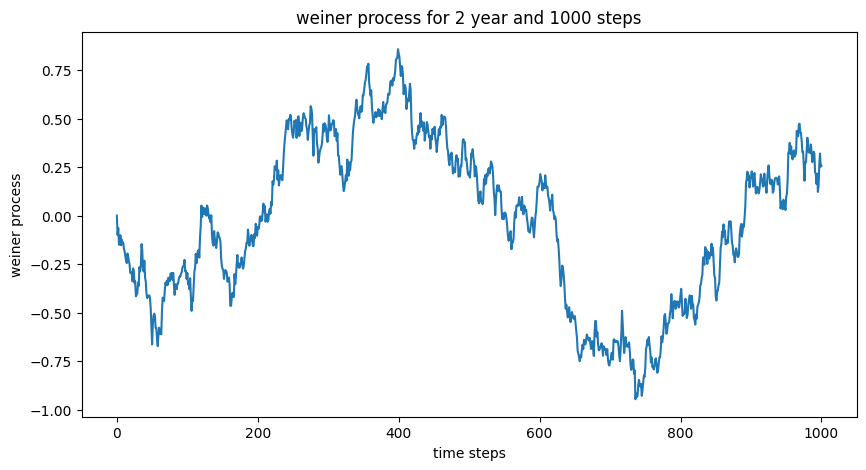

In [40]:
def Weiner_Process(T,steps):
    dt = T/steps
    Z = np.random.randn(steps) #creating random normal increments
    W = [0]
    for i in range(1,steps+1):
        W.append(W[i-1] + np.sqrt(dt) * Z[i-1]) #W[i] is the sum of the increments upto that point
    plt.figure(figsize=(10,5))
    plt.plot(W)
    plt.title(f"weiner process for {T} year and {steps} steps")
    plt.xlabel("time steps")
    plt.ylabel("weiner process")
    plt.show()

Weiner_Process(1,100)
Weiner_Process(2,1000)

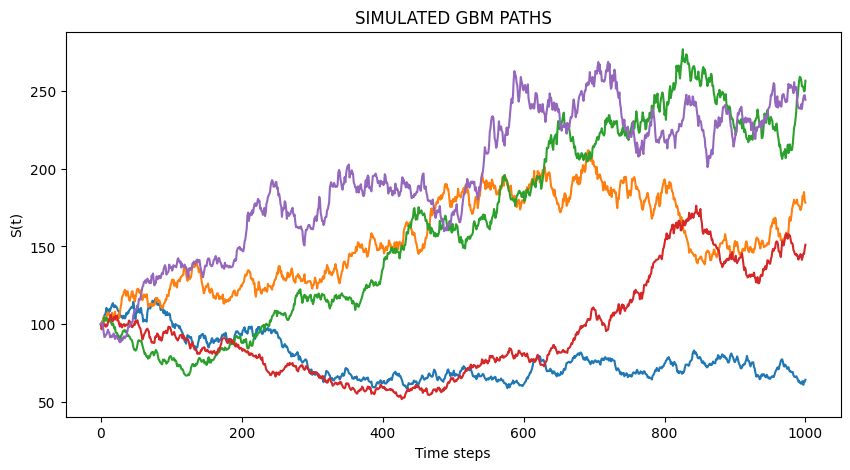

In [41]:
#creating MonteCarlo class for stimulating gbm paths
class MonteCarlo:
    #recently learned OOPS so trying to implement
    def __init__(self,S0,sigma,T,steps,paths,alpha):
        self.S0 = S0
        self.sigma = sigma
        self.T = T
        self.steps = steps
        self.paths = paths
        self.alpha = alpha
    
    def stimulate(self): 
        Z = np.random.randn(self.paths, self.steps) #creating random normal incremeents
        time_step = self.T / self.steps
        self.S_t = np.zeros((self.paths,self.steps + 1)) #creating the 2d price paths array
        self.S_t[:,0] = self.S0 #each path has same initial price S0

        for t in range(1,self.steps + 1):
            #this is where the increments are used
            self.S_t[:,t] = self.S_t[:,t-1] * np.exp(self.sigma * np.sqrt(time_step) * Z[:,t-1] + (self.alpha - self.sigma **2 /2) * (time_step)) 
        
    #plotting the paths
    def plot(self):
        plt.figure(figsize=(10,5))
        for i in range(self.paths):
            plt.plot(self.S_t[i])
        plt.title("SIMULATED GBM PATHS")
        plt.xlabel("Time steps")
        plt.ylabel("S(t)")
        plt.show()

S0 = 100
sigma = 0.5
T = 1
alpha = 0.25
steps = 1000
paths = 5

stimulating = MonteCarlo(S0,sigma,T,steps,paths,alpha)
stimulating.stimulate()
stimulating.plot()